In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['c0','c1','c2','c3'],
                    'D':['D0','D1','D2','D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['c4','c5','c6','c7'],
                    'D':['D4','D5','D6','D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['c8','c9','c10','c11'],
                    'D':['D8','D9','D10','D11']},
                   index=[8, 9, 10, 11])

In [3]:
df1

,A,B,C,D
0,A0,B0,c0,D0
1,A1,B1,c1,D1
2,A2,B2,c2,D2
3,A3,B3,c3,D3


In [4]:
df2

,A,B,C,D
4,A4,B4,c4,D4
5,A5,B5,c5,D5
6,A6,B6,c6,D6
7,A7,B7,c7,D7


In [5]:
df3

,A,B,C,D
8,A8,B8,c8,D8
9,A9,B9,c9,D9
10,A10,B10,c10,D10
11,A11,B11,c11,D11


In [6]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,c0,D0
1,A1,B1,c1,D1
2,A2,B2,c2,D2
3,A3,B3,c3,D3
4,A4,B4,c4,D4
5,A5,B5,c5,D5
6,A6,B6,c6,D6
7,A7,B7,c7,D7
8,A8,B8,c8,D8
9,A9,B9,c9,D9


In [7]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   c0   D0
  1    A1   B1   c1   D1
  2    A2   B2   c2   D2
  3    A3   B3   c3   D3
y 4    A4   B4   c4   D4
  5    A5   B5   c5   D5
  6    A6   B6   c6   D6
  7    A7   B7   c7   D7
z 8    A8   B8   c8   D8
  9    A9   B9   c9   D9
  10  A10  B10  c10  D10
  11  A11  B11  c11  D11

In [8]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [9]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [10]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [11]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                   'D':['D2','D3','D6','D7'],
                   'F':['F2','F3','F6','F7']},
                   index=[2, 3, 6, 7])
result = pd.concat([df1,df4], axis=1)

In [12]:
df1

,A,B,C,D
0,A0,B0,c0,D0
1,A1,B1,c1,D1
2,A2,B2,c2,D2
3,A3,B3,c3,D3


In [13]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [14]:
result

,A,B,C,D,B,D,F
0,A0,B0,c0,D0,NaN,NaN,NaN
1,A1,B1,c1,D1,NaN,NaN,NaN
2,A2,B2,c2,D2,B2,D2,F2
3,A3,B3,c3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [15]:
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,c2,D2,B2,D2,F2
3,A3,B3,c3,D3,B3,D3,F3


In [16]:
result = pd.concat([df1,df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,c0,D0,NaN,NaN,NaN
1,A1,B1,c1,D1,NaN,NaN,NaN
2,A2,B2,c2,D2,B2,D2,F2
3,A3,B3,c3,D3,B3,D3,F3


In [17]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,c0,D0,NaN
1,A1,B1,c1,D1,NaN
2,A2,B2,c2,D2,NaN
3,A3,B3,c3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [18]:
left = pd.DataFrame({'key':['K0','K4','k2','K3'],
                       'A':['A0','A1','A2','A3'],
                       'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                        'C':['C0','C1','C2','C3'],
                        'D':['D0','D1','D2','D3']})

In [19]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,k2,A2,B2
3,K3,A3,B3


In [20]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [21]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K3,A3,B3,C3,D3


In [22]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,k2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3


In [23]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,NaN,NaN,C2,D2
3,K3,A3,B3,C3,D3


In [24]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,k2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1
5,K2,NaN,NaN,C2,D2


In [25]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K3,A3,B3,C3,D3


In [26]:
import pandas as pd

In [27]:
CCTV = pd.read_csv('CCTV_Kangbookku.csv', encoding='utf-8')
CCTV = CCTV.drop(index=0)
CCTV

,연도,동명,설치 수
1,2011년,삼양동,2
2,2011년,미아동,2
3,2011년,송중동,2
4,2011년,송천동,2
5,2011년,삼각산동,0
6,2011년,번1동,2
7,2011년,번2동,2
8,2011년,번3동,2
9,2011년,수유1동,1
10,2011년,수유2동,2


In [28]:
CCTV.head()

,연도,동명,설치 수
1,2011년,삼양동,2
2,2011년,미아동,2
3,2011년,송중동,2
4,2011년,송천동,2
5,2011년,삼각산동,0


In [29]:
CCTV['설치 수'] = pd.to_numeric(CCTV['설치 수'], errors='coerce')

In [30]:
import matplotlib.pyplot as plt
plt.rc('font', family='malgun Gothic')

In [32]:
CCTV.set_index('동명', inplace=True)

<Axes: ylabel='동명'>

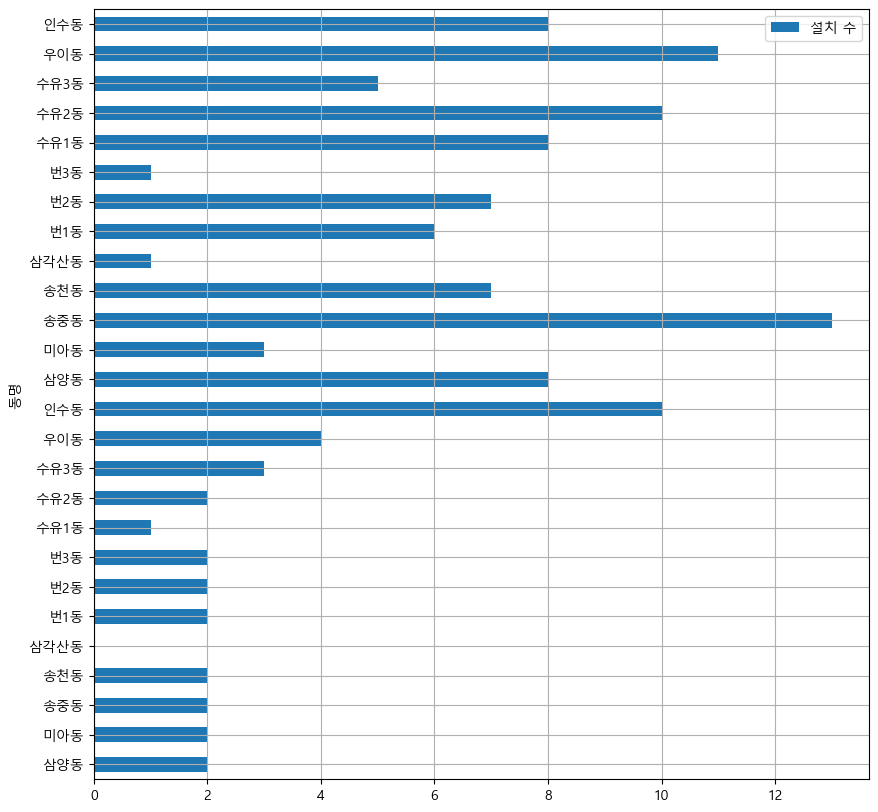

In [33]:
CCTV.plot(kind='barh', grid=True, figsize=(10,10))